# EDA using basic data functions with python and the lightning strike dataset from 2018

In [3]:
#import packagases and libs
!pip install -r "requirements"
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [56]:
#read in the data


df = pd.read_csv("datasets/eda_manipulate_date_strings_with_python.csv")

In [57]:
#convert the date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [58]:
#create new columns
df["week"] = df["date"].dt.strftime("%Y-W%V") #year with week nr
df["month"] = df['date'].dt.strftime("%Y-%m") #year with month
df["quarter"] = df["date"].dt.to_period("Q").dt.strftime("%Y-Q%q") #year with quarters
df["year"]= df["date"].dt.strftime("%Y") #year

In [59]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


In [60]:
#get info about the data and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   week               object        
 4   month              object        
 5   quarter            object        
 6   year               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 559.6+ MB


In [62]:
df.describe()

,number_of_strikes
count,1.047900e+07
mean,1.157347e+01
std,2.788072e+01
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,2.386000e+03


In [63]:
df.sample()

,date,number_of_strikes,center_point_geom,week,month,quarter,year
9307285,2018-08-27,6,POINT(-91.2 49.8),2018-W35,2018-08,2018-Q3,2018


In [64]:
df.size

73353021

In [65]:
df.shape

(10479003, 7)

In [66]:
#creating a month column so data can be grouped by month
df["month"]= df["date"].dt.month
df.head()

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,8,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,8,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,8,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,8,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,8,2016-Q3,2016


In [68]:
#creating a new mont_txt" column
df_by_week_2018 = df[df["year"]=="2018"].groupby(["week"]).sum().reset_index()

In [69]:
df_by_week_2018


,week,number_of_strikes,month
0,2018-W01,34843,11703
1,2018-W02,353425,20615
2,2018-W03,37132,5354
3,2018-W04,412772,23309
4,2018-W05,34972,5753
5,2018-W06,568417,37494
6,2018-W07,60847,11306
7,2018-W08,1347198,71942
8,2018-W09,94082,23447
9,2018-W10,196358,68169


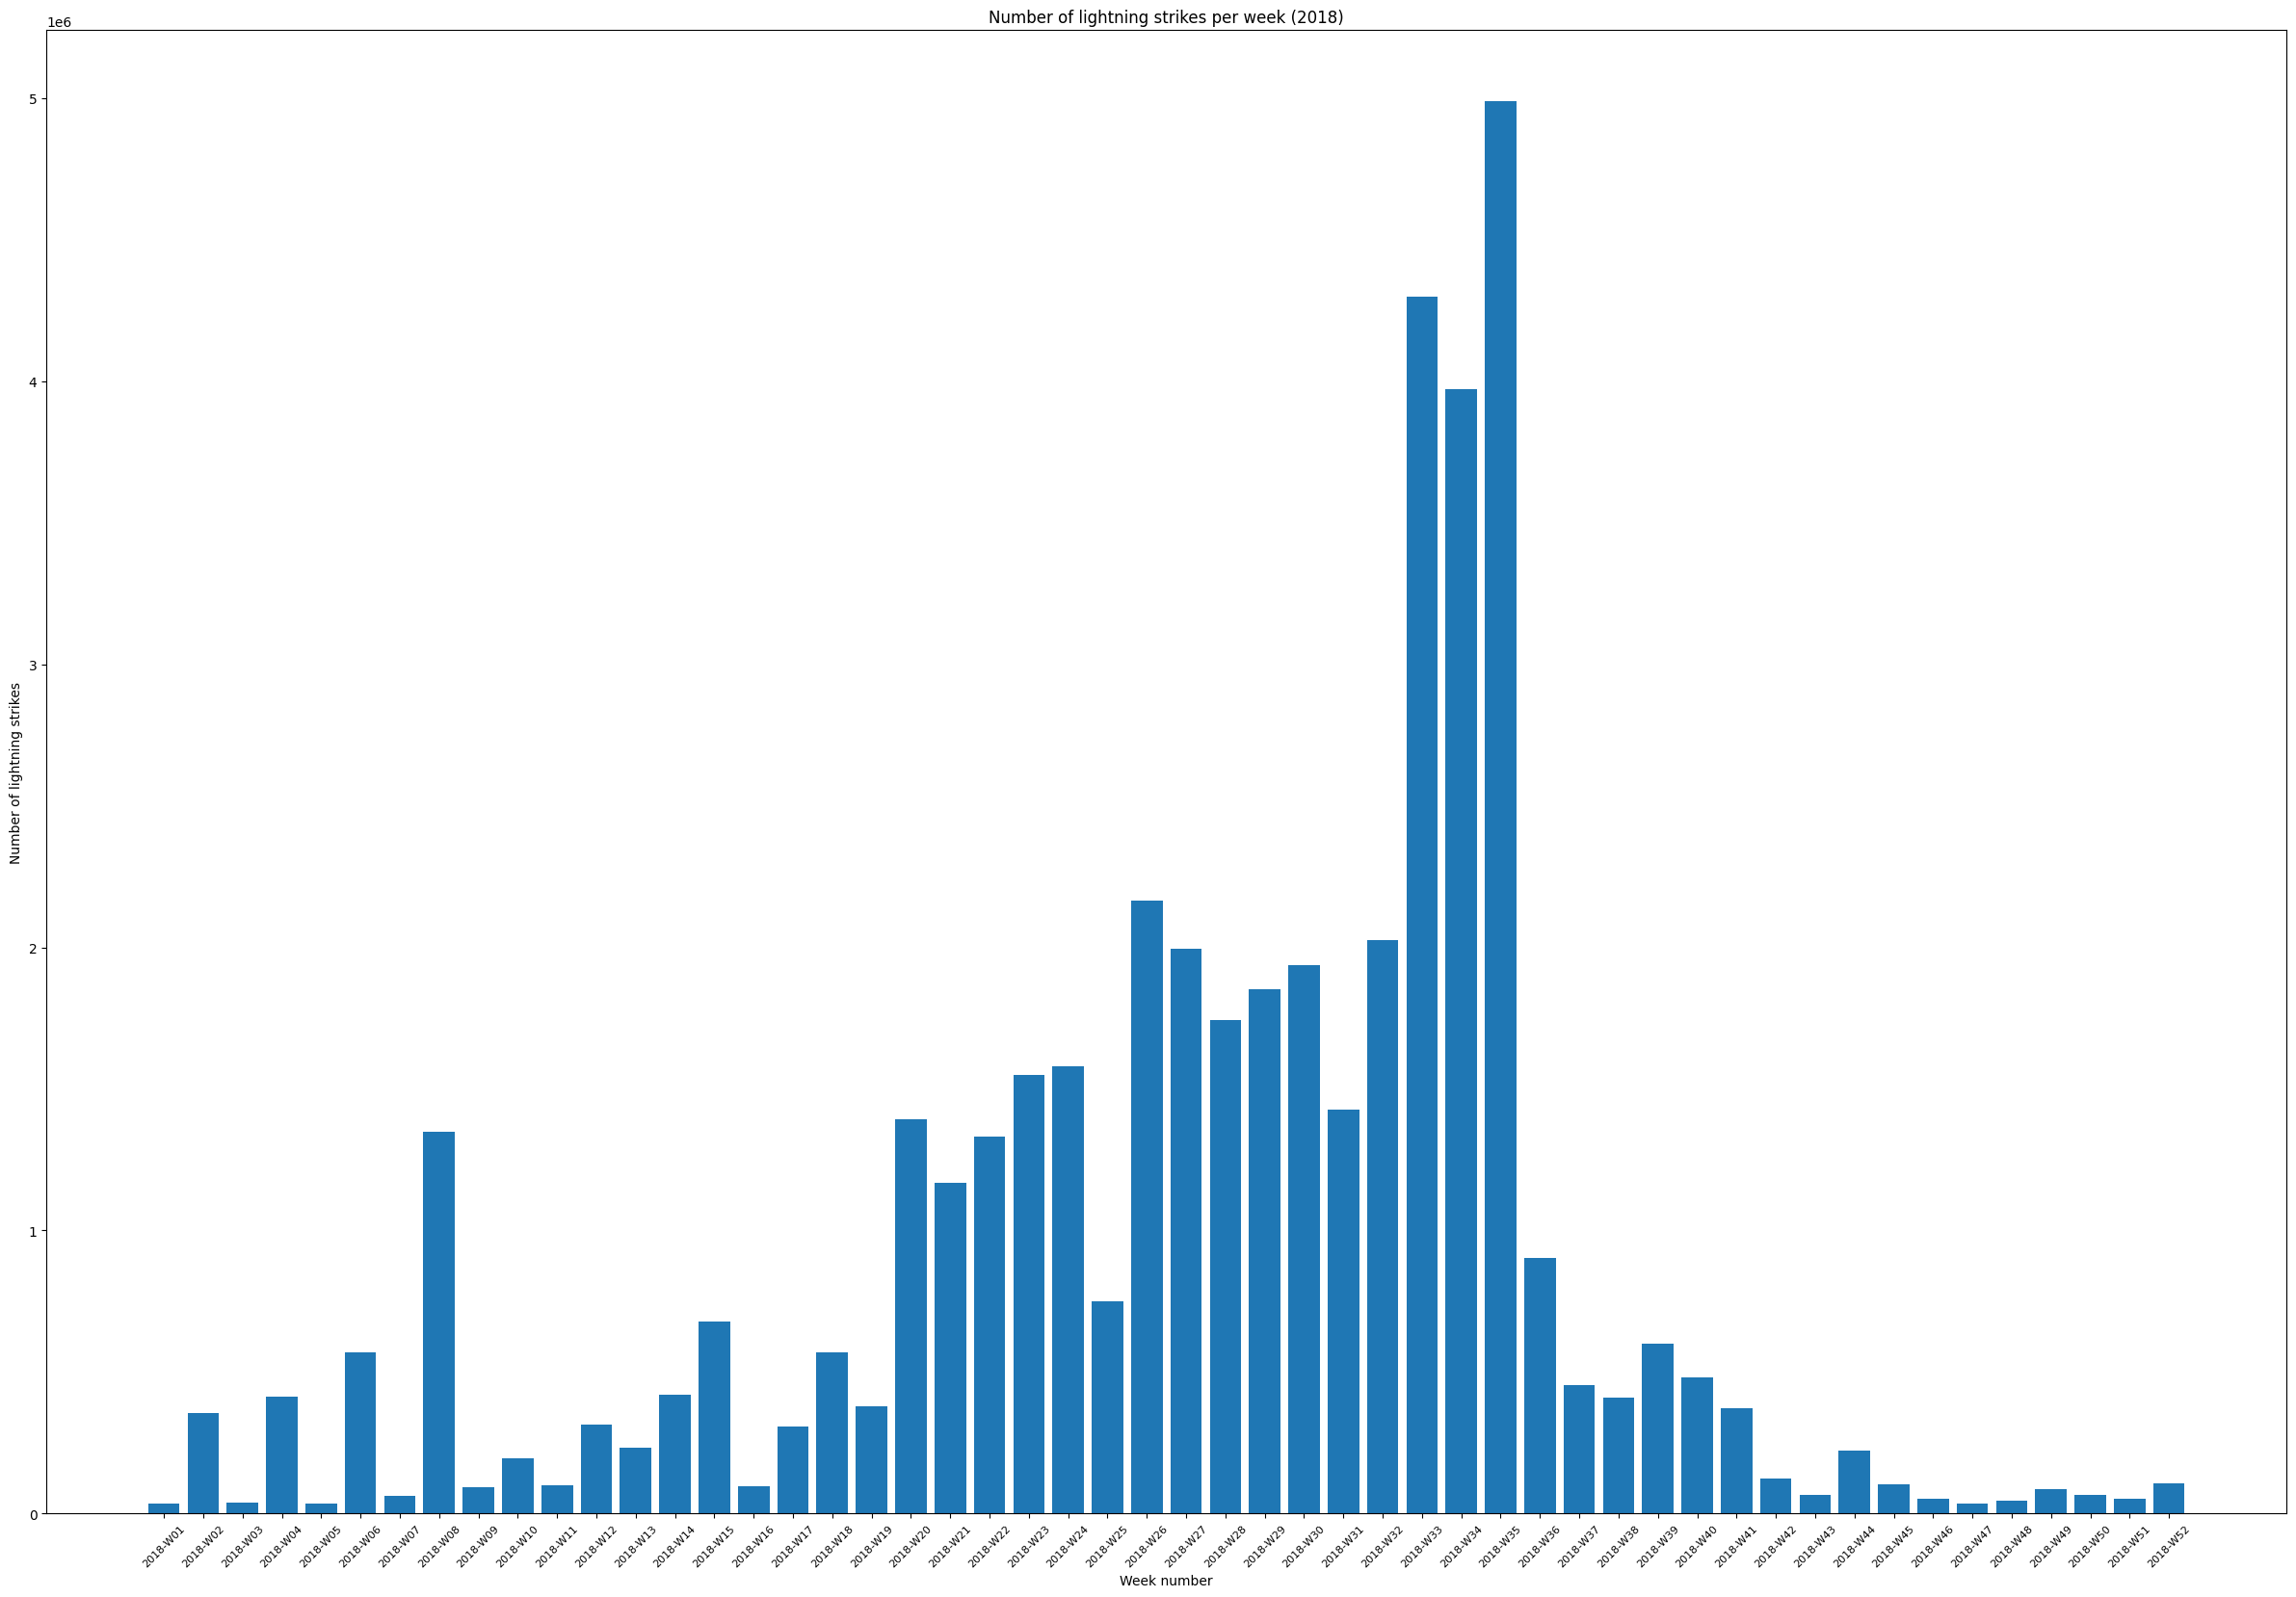

In [70]:
plt.bar(x=df_by_week_2018["week"], height=df_by_week_2018["number_of_strikes"])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize= 8) #rotates the x axis labes and decreases the font
plt.rcParams["figure.figsize"] = (30,20) # width and heightadjust the figure width
plt.show()

In [71]:
#plot by quarter
df_by_quarter = df.groupby(["quarter"]).sum().reset_index()

df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'
df_by_quarter["number_of_strikes"].div(1000000).round(1).astype(str)+ "M" #div = division function


0      2.7M
1     15.1M
2     21.8M
3      2.0M
4      2.4M
5     13.5M
6     17.3M
7      1.8M
8      3.8M
9     12.1M
10    26.9M
11     1.8M
Name: number_of_strikes, dtype: object

In [72]:
def addlabels(x,y,labels):
    #iterates over the data and plots text labels above each bar of bar graph
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha= "center", va= "bottom")

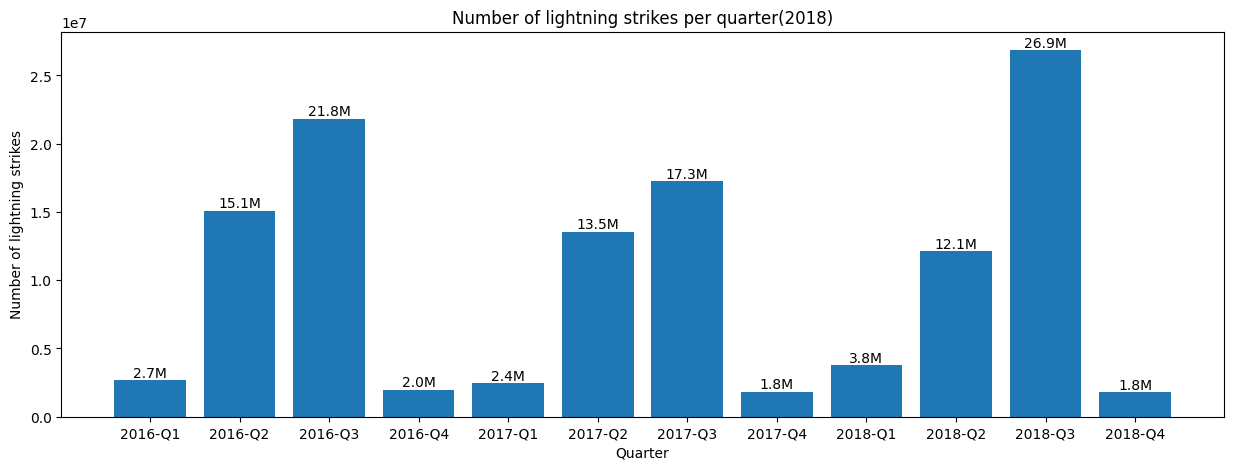

In [73]:
plt.figure(figsize=(15,5))
plt.bar(x=df_by_quarter["quarter"], height=df_by_quarter["number_of_strikes"])
addlabels(df_by_quarter["quarter"], df_by_quarter["number_of_strikes"], df_by_quarter["number_of_strikes_formatted"])
plt.plot()
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter(2018)")
plt.show()

In [74]:
#creating new columns for the quarter number and year

# Create two new columns
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()




,quarter,number_of_strikes,month,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,745176,2.7M,Q1,2016
1,2016-Q2,15084857,6370059,15.1M,Q2,2016
2,2016-Q3,21843820,15018691,21.8M,Q3,2016
3,2016-Q4,1969754,3232407,2.0M,Q4,2016
4,2017-Q1,2444279,721533,2.4M,Q1,2017


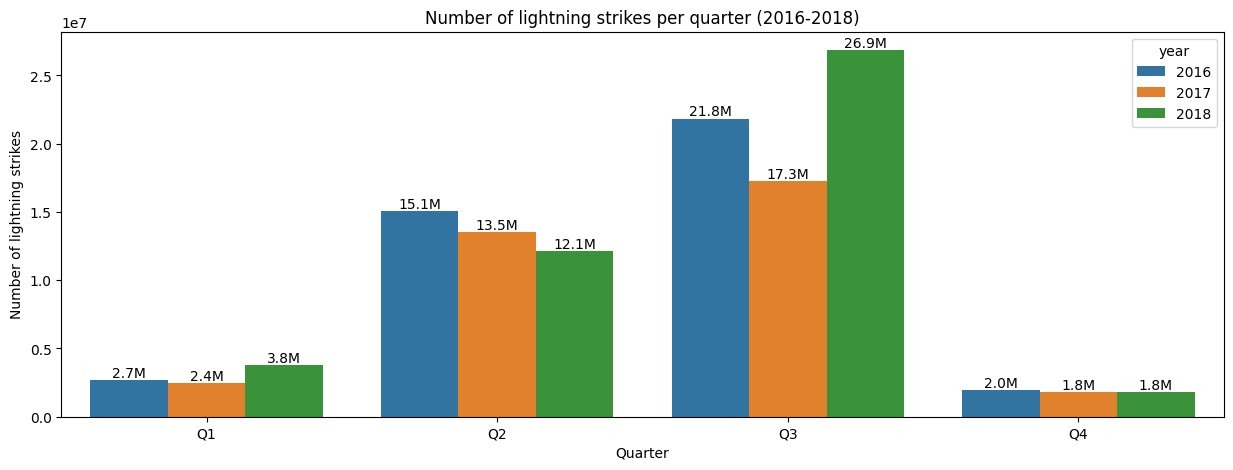

In [75]:


#Next, fill in the bar chart parameters. 



plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()
